In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set_theme(style="whitegrid")

# Load the training dataset
train_df = pd.read_csv("train.csv")



In [73]:
# Display basic info
print("\n--- Basic Info ---")
print(train_df.info())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [74]:
# Display first few rows
print("\n--- First 5 Rows ---")
print(train_df.head())


--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [75]:
# Check missing values
print("\n--- Missing Values ---")
print(train_df.isnull().sum())


--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
# Summary statistics
print("\n--- Summary Statistics ---")
print(train_df.describe(include="all"))


--- Summary Statistics ---
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
cou

In [77]:
# handling missing values

#fill age with the median of the age column
train_df.fillna({"Age":train_df["Age"].median()}, inplace=True)

#remove cabin column because it has too many missing values
train_df.drop(columns=['Cabin'],inplace=True)

# Fill embarked with the mode
train_df.fillna({"Embarked":train_df["Embarked"].mode()[0]}, inplace=True)

In [ ]:
# Saving the modified DataFrame to a new CSV file
train_df.to_csv('modified_train.csv', index=False)

In [6]:
# Loading new cleared dataset the training dataset
train_df_b = pd.read_csv("modified_train.csv")

In [ ]:
print(train_df_b.head(5))
print(train_df_b.describe(include="all"))

 

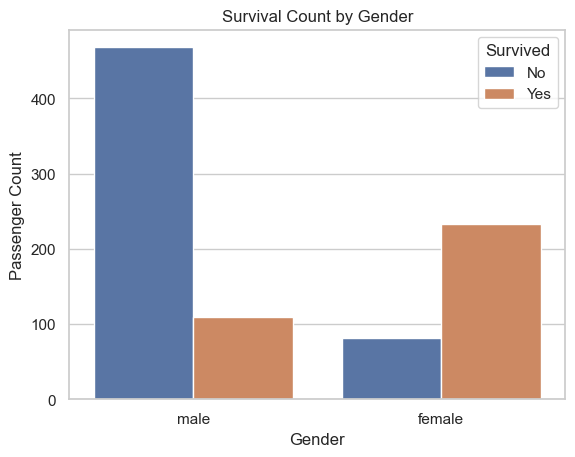

In [97]:
# Survival by gender
sns.countplot(data=train_df_b, x='Sex', hue='Survived')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Passenger Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


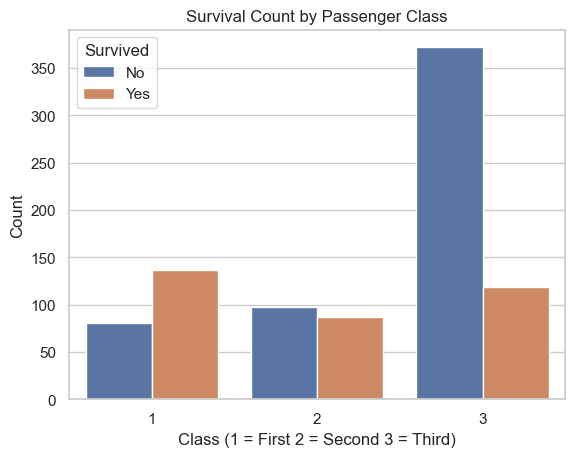

In [ ]:
# Survival by Passenger Class
sns.countplot(data=train_df_b, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Class (1 = First 2 = Second 3 = Third)")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


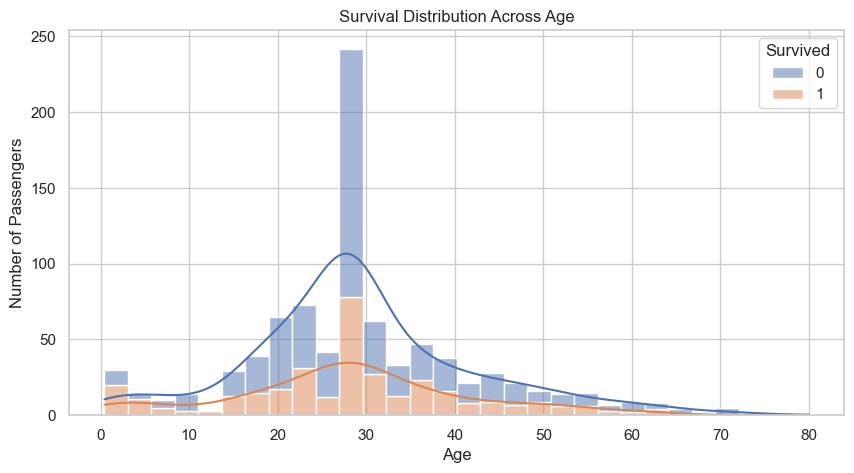

In [ ]:
# Survival distribution across age
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df_b, x='Age', bins=30, hue='Survived', kde=True, multiple='stack')
plt.title("Survival Distribution Across Age")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


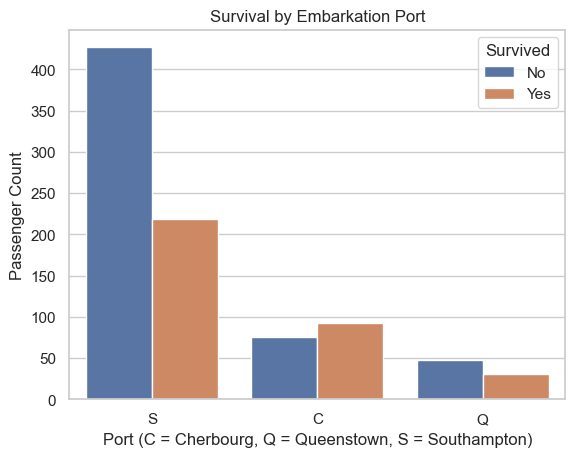

In [ ]:
#Survival by Embarked Port
sns.countplot(data=train_df_b, x='Embarked', hue='Survived')
plt.title("Survival by Embarkation Port")
plt.xlabel("Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Passenger Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


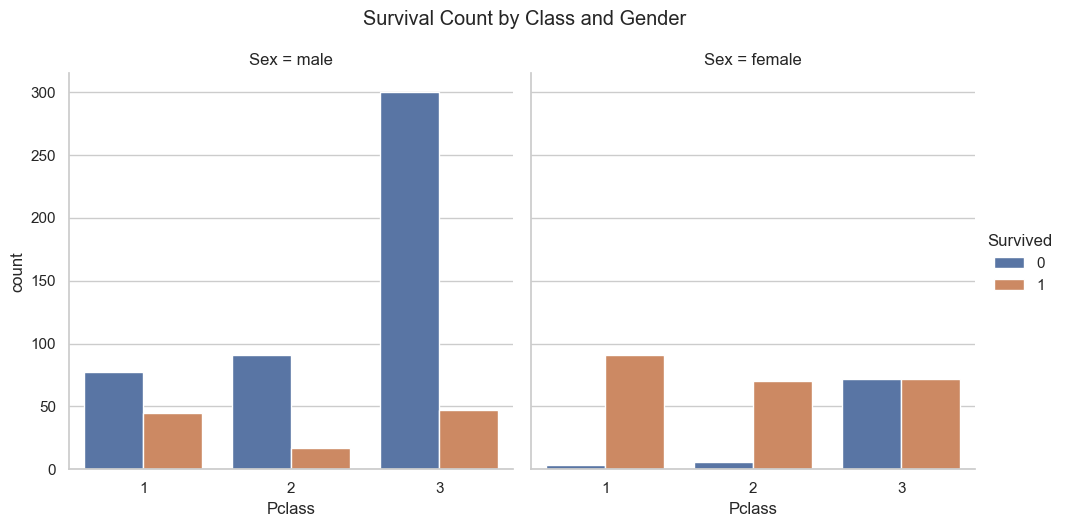

In [99]:
#Gender + Class → Survival
sns.catplot(data=train_df_b, x='Pclass', hue='Survived', col='Sex', kind='count')
plt.suptitle("Survival Count by Class and Gender", y=1.05)
plt.show()


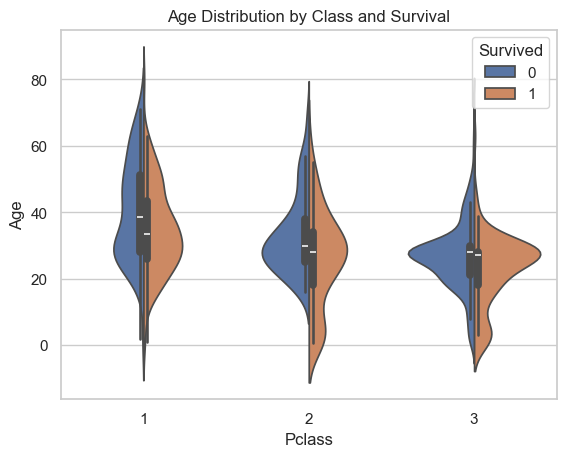

In [98]:
#Age Distribution by Class and Survival
sns.violinplot(data=train_df_b, x='Pclass', y='Age', hue='Survived', split=True)
plt.title("Age Distribution by Class and Survival")
plt.show()


In [21]:
# Feature 1: FamilySize (SibSp + Parch + 1)
train_df_b['FamilySize'] = train_df_b['SibSp'] + train_df['Parch'] + 1

# Feature 2: Title extraction from Name
train_df_b['Title'] = train_df_b['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
title_replacements = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Countess": "Rare", "Lady": "Rare", "Sir": "Rare",
    "Jonkheer": "Rare", "Don": "Rare", "Dona": "Rare", "Capt": "Rare", "Col": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare"
}
train_df_b['Title'] = train_df_b['Title'].replace(title_replacements)


In [29]:
# Encode categorical features

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
label_enc = LabelEncoder()
train_df_b['Sex'] = label_enc.fit_transform(train_df_b['Sex'])
train_df_b['Embarked'] = label_enc.fit_transform(train_df_b['Embarked'])
train_df_b['Title'] = label_enc.fit_transform(train_df_b['Title'])

In [ ]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Title']
X = train_df_b[features]
y = train_df_b['Survived']


In [32]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [34]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



--- Model Evaluation ---
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [35]:
# Train Random Forest model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
#predict and evaluate
y_pred = model.predict(X_test)
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.8379888268156425
Confusion Matrix:
 [[91 14]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



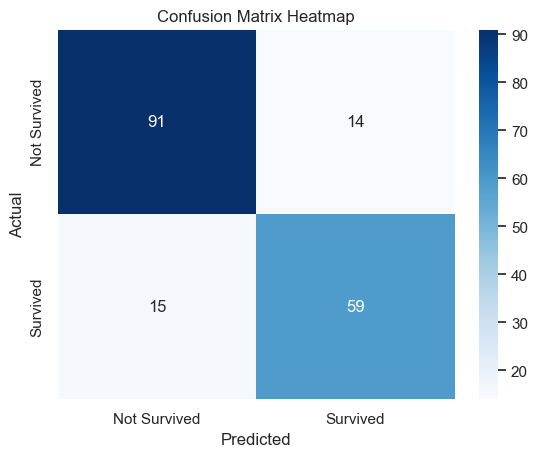

In [38]:
# Plot confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

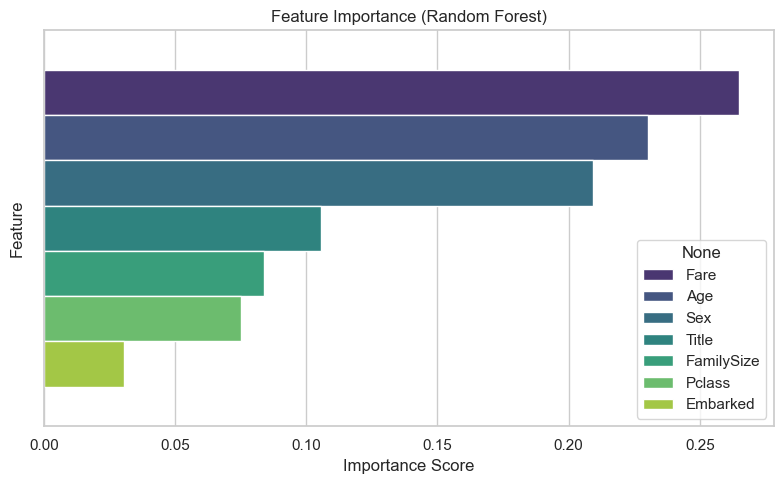

In [40]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp.values, hue=feat_imp.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [41]:
# Export predictions to CSV
output_df = X_test.copy()
output_df['Survived_Prediction'] = y_pred
output_df.to_csv("titanic_predictions.csv", index=False)
print("\nPredictions saved to titanic_predictions.csv")



Predictions saved to titanic_predictions.csv
